In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data
import yfinance as yf

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creating  a linear regression model
from sklearn.linear_model import LinearRegression

from pmdarima import auto_arima

In [6]:
#Reading the data for the past 13 years.
df = yf.download('FB','2012-01-01','2021-10-11')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [17]:
df=df[['Adj Close']]

In [19]:
df.head()

,Adj Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


In [20]:
df.rename(columns={'Date':'date','Adj Close':'price_t'},inplace=True)

In [21]:
df.head()

,price_t
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


In [22]:
df['price_t-1']=df['price_t'].shift(1)

In [23]:
df.head()

,price_t,price_t-1
Date,,
2012-05-18,38.230000,NaN
2012-05-21,34.029999,38.230000
2012-05-22,31.000000,34.029999
2012-05-23,32.000000,31.000000
2012-05-24,33.029999,32.000000


In [24]:
df['returns_manual']=(df['price_t']/df['price_t-1'])-1

In [25]:
df.head()

,price_t,price_t-1,returns_manual
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861
2012-05-22,31.000000,34.029999,-0.089039
2012-05-23,32.000000,31.000000,0.032258
2012-05-24,33.029999,32.000000,0.032187


In [26]:
df.tail()

,price_t,price_t-1,returns_manual
Date,,,
2021-10-04,326.230011,343.010010,-0.048920
2021-10-05,332.959991,326.230011,0.020630
2021-10-06,333.640015,332.959991,0.002042
2021-10-07,329.220001,333.640015,-0.013248
2021-10-08,330.049988,329.220001,0.002521


In [27]:
df['retuns_pct_change_method']=df['price_t'].pct_change()

In [28]:
df.head()

,price_t,price_t-1,returns_manual,retuns_pct_change_method
Date,,,,
2012-05-18,38.230000,NaN,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861,-0.109861
2012-05-22,31.000000,34.029999,-0.089039,-0.089039
2012-05-23,32.000000,31.000000,0.032258,0.032258
2012-05-24,33.029999,32.000000,0.032187,0.032187


In [30]:
df['returns']=(df['price_t']/df['price_t'].shift(1))-1

<AxesSubplot:xlabel='Date'>

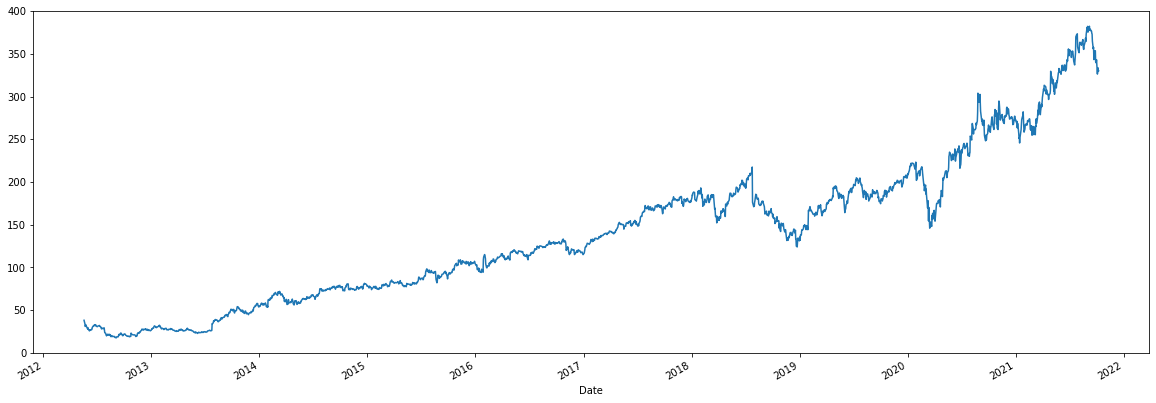

In [33]:
df['price_t'].plot(figsize=(20,7))

<AxesSubplot:xlabel='Date'>

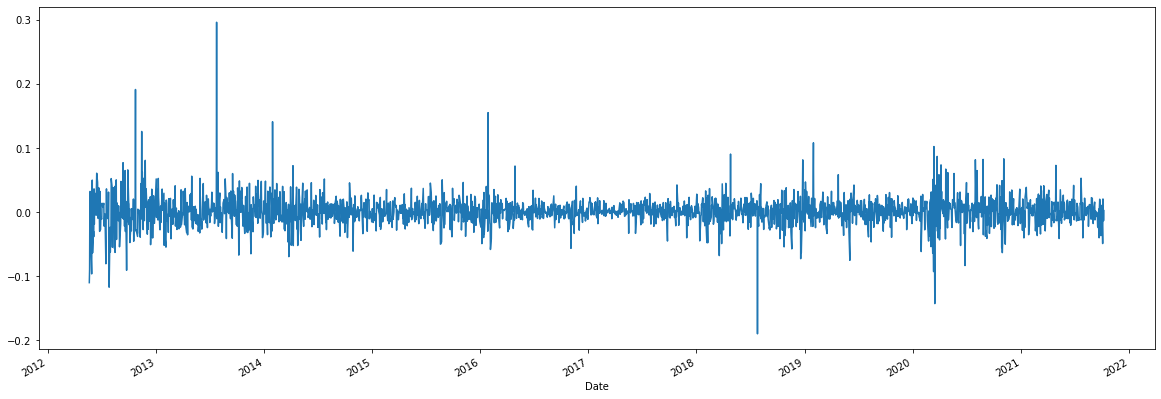

In [36]:
df['returns'].plot(figsize=(20,7))